In [1]:
import numpy as np
import os
# loading the numpy data saved from the pre-processing file
data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

# The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# The second layer followed by Relu and Maxpooling layer
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the layers to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))
# Dense layer of 50 neurons
model.add(Dense(50, activation='relu'))
# The final layer with two outputs for the two categories
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)
# X = data ; y = target

In [4]:
folder = 'trained_model'
path = os.path.join(os.getcwd(), folder)

if(os.path.isdir(path) == False):
    os.mkdir(path)
    print("New Directory created for storing trained model")
else:
    print("Directory already exists, data to be stored in the directory")

New Directory created for storing trained model


In [5]:
file = os.path.join(path, 'model-{epoch:03d}.h5')
cp = ModelCheckpoint(file, monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(X_train, y_train, epochs=20, callbacks=[cp], validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 77s 2s/step - loss: 0.7894 - accuracy: 0.5202 - val_loss: 0.6899 - val_accuracy: 0.4315
Epoch 2/20
31/31 [==============================] - 76s 2s/step - loss: 0.6591 - accuracy: 0.5758 - val_loss: 0.7251 - val_accuracy: 0.4274
Epoch 3/20
31/31 [==============================] - 76s 2s/step - loss: 0.5834 - accuracy: 0.6657 - val_loss: 0.6044 - val_accuracy: 0.8306
Epoch 4/20
31/31 [==============================] - 77s 2s/step - loss: 0.4973 - accuracy: 0.8101 - val_loss: 0.3622 - val_accuracy: 0.8629
Epoch 5/20
31/31 [==============================] - 76s 2s/step - loss: 0.2946 - accuracy: 0.8737 - val_loss: 0.2468 - val_accuracy: 0.9073
Epoch 6/20
31/31 [==============================] - 76s 2s/step - loss: 0.2065 - accuracy: 0.9202 - val_loss: 0.1853 - val_accuracy: 0.9395
Epoch 7/20
31/31 [==============================] - 75s 2s/step - loss: 0.1536 - accuracy: 0.9505 - val_loss: 0.1912 - val_accuracy: 0.9194
Epoch 8/20
31/31 [==

In [6]:
graph = 'graphs'
graph_path = os.path.join(os.getcwd(), graph)

if(os.path.isdir(graph_path) == False):
    os.mkdir(graph_path)
    print("New Directory created for storing graphs")
else:
    print("Directory already exists, data to be stored in the directory")

New Directory created for storing graphs


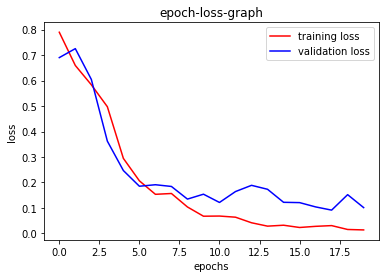

In [7]:
import matplotlib.pyplot as plt

title = "epoch-loss-graph"
file = os.path.join(graph_path, 'graph_' +title + '.png')

plt.plot(history.history['loss'], 'r', label='training loss')
plt.plot(history.history['val_loss'], 'b', label='validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title(title)
plt.savefig(file)
plt.show()
plt.close()



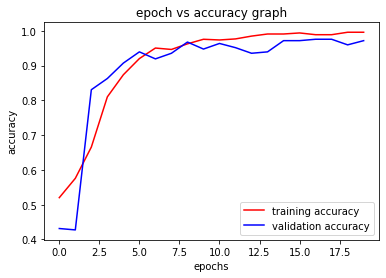

In [8]:
title = "epoch vs accuracy graph"
file = os.path.join(graph_path, 'graph_' +title + '.png')

plt.plot(history.history['accuracy'], 'r', label='training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title(title)
plt.legend()
plt.savefig(file)
plt.show()
plt.close()

In [9]:
print("Model evaluation")
print(model.evaluate(X_test, y_test))

Model evaluation
5/5 [==============================] - 2s 454ms/step - loss: 0.2047 - accuracy: 0.9348
[0.20474930107593536, 0.9347826242446899]
